# 34 순열

- 서로 다른 정수를 입력 받아 가능한 모든 순열을 리턴하라.

- 입력 [1, 2, 3]

- 출력
[
     [1,2,3],
     [1,3,2],
     [2,1,3],
     [2,3,1],
     [3,1,2],
     [3,2,1]
]

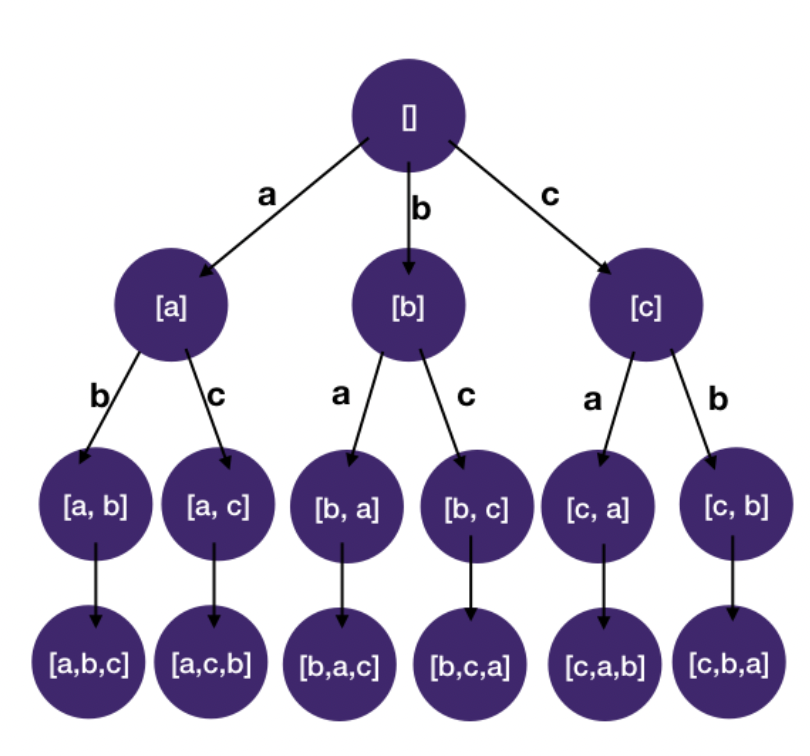

참조가 되지 않도록 값 자체를 복사하려면 어떻게 해야할까요??

가장 간단한 방법은 [:]로 처리하는 방법입니다.

In [12]:
a = [1,2,3]

b = a

c = a[:]

id(a), id(b), id(c)

(140416039923952, 140416039923952, 140416039930208)

In [13]:
a, b, c

([1, 2, 3], [1, 2, 3], [1, 2, 3])

a, b, c 위의 값은 동일하게 나오지만

a, b 와 다르게 [:] 로 처리한 변수 c는 새로운 객체가 되었음을 확인 할 수 있습니다.

이외에도 직관적으로 처리하는 방법은 명시적으로 copy() 메소드를 사용하는 방법이 있는데,

In [14]:
d = a.copy()

id(a), id(b), id(c), id(d)

(140416039923952, 140416039923952, 140416039930208, 140416039325040)

위의 결과를 보면 알 수 있듯이, d 역시 다른 ID를 갖, 새로운 객체가 되었음을 확인 할 수 있습니다.

위 처럼 단순한 리스트는 [:] 나 copy()로도 충분하지만,

복잡한 리스트의 경우엔

`copy.deepcopy()`로 처리해야 중첩된 리스트도 문제 없이 복사가 된다고 합니다.

In [15]:
import copy

a = [1, 2, [3,5], 4]

b = copy.deepcopy(a)

id(a), id(b), b

(140416039931984, 140416039931568, [1, 2, [3, 5], 4])

예시 => 1,2,3 의 순열을 구하는 방법

curr(e), next, path에 대한 설명

- curr(e) : 사용 가능한 숫자들 (e는 사용 가능 숫자들 중 현재 추가하려는 숫자).
- next : 사용 가능한 숫자들에서 현재 추가하려는 숫자(e)를 뺀 나머지 숫자들.

다음 재귀에서 새롭게 curr이 될 것입니다.

- path : path는 각 재귀 호출마다 순열 조합이 저장되는 공간입니다.

만약 하나의 완전한 순열 조합을 만들었다면 results에 저장하고 path는 pop 을 통해서 
리프 노드에서 다시 상위 노드로 이동할 수 있게 된다.

- 재귀 호출을 하다가 리프 노드(더 이상 자식노드가 없음)를 만나게 되면 
  리프노드의 결과를 results에 저장하고 리턴합니다.

- 이때 저장할 때는 results.append(path[:])로 저장합니다.

왜 curr 대신 curr[:]을 사용했을까?
- 파이썬은 모든 객체를 참조하는 형태로 처리됩니다.
- 즉, curr을 전달하게 되면 참조된 값이 변경될 경우 같이 바뀌게 됩니다. 
- 따라서 순열 문제를 풀 때는 값만 복사되고 참조는 같은 형태로 전달되지 않도록 주의해야 됩니다.
- copy.copy(curr)라는 메소드를 사용할 수도 있지만 간단하게 curr[:]으로도 처리 가능해 집니다.


- curr(e) -> 1,2,3 (1)   2 3 (2)   3 (3)   x
- next -> 2,3   3.  x
- path -> 1 (1 pop) / 1,2 (2 pop) / 1, 2, 3, (3 pop) 1,2,3 (저장)

- curr(e) -> 위에서 1을 사용했으니깐 생략   2 3 (3)   2 (2)   x
- next ->                             2          x
- path ->  / 1,3 (3 pop) / 1, 3 (2 pop) 1,3,2 (저장)

와 같은 방식을 반복하면,

results에 [1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1] 가 저장이 되고,

위의 코드가 다 돌고 나면

결과적으로

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]] 가 나옵니다.

In [16]:
from typing import List

class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        results = []
        path = []

        def dfs(curr):
            # 리프 노드일때 결과 추가
            if len(curr) == 0:
                results.append(path[:])

            # 순열 생성 재귀 호출
            for e in curr:
                next = curr[:]
                next.remove(e)

                path.append(e)
                dfs(next)
                path.pop()

        dfs(nums)
        return results


s = Solution()
print(s.permute([1, 2, 3]))

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]
